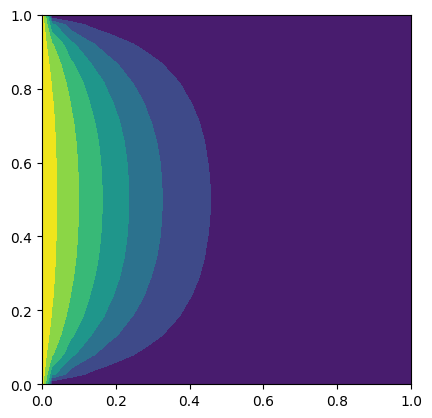

In [2]:
# kadai1

import numpy as np
import matplotlib.pyplot as plt

# それぞれの要素の温度の初期値と，境界条件の設定
Nx=20; Ny=20;
T0 = np.zeros([Ny+1, Nx+1]);
T = np.zeros([Ny+1, Nx+1]);

T0[:] = 0.0
Tbc_w = 1.0;  Tbc_e = 0.0; Tbc_n=0.0; Tbc_s = 0.0;
T0[:, 0] = Tbc_w; # left edge
T0[:, Nx]= Tbc_e; # right edge

# 平板の微小要素中心の座標とメッシュの座標を定義
Lx=1.0; Ly=1.0;
dx = Lx/Nx; dy = Ly/Ny;
x = np.linspace(0.0, Lx, Nx);
xp= np.linspace(-0.5*dx, Lx+0.5*dx, Nx+1)
y = np.linspace(0.0, Ly, Ny);
yp= np.linspace(-0.5*dy, Ly+0.5*dy, Ny+1)

# 時間刻みを設定
dt=0.0005; # set from dt/(dz*dz) < 1/2
dtx2 = dt/dx/dx
dty2 = dt/dy/dy

# 全要素の温度T0をTを更新するループ関数
def update_T(T,T0):
  for j in range(Ny+1): # y-loop
    for i in range(Nx+1): # x-loop
      if i==0: # west
        T[j, i] = 2.0*Tbc_w - T0[j, i+1] # 温度固定
      elif i==Nx: # east
        T[j, i] = 2.0*Tbc_e - T0[j, i-1]
      elif j==0: # south
        T[j, i] = 2.0*Tbc_s - T0[j+1, i]
      elif j==Ny: # north
        T[j, i] = 2.0*Tbc_n - T0[j-1, i]
      else:
        T[j, i] = (1.0 - 2.0*dtx2 - 2.0*dty2)*T0[j, i] + dtx2*(T0[j, i+1] + T0[j, i-1]) + dty2*(T0[j+1, i] + T0[j-1, i]);
  return

# 計算実行(100ステップの例)
for itr in range(100): # time looping
  update_T(T,T0)
  T0 = T.copy(); # 更新したTをT0に格納してから，次の時間反復へ

plt.contourf(xp, yp, T0, 20, cmap='viridis', vmin=0.0, vmax=1.0);
#plt.colorbar(vmin=0, vmax=1.0)
plt.axis('square') # axis square
plt.xlim([0, Lx]); plt.ylim([0, Ly]); plt.show();